In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


df=pd.read_csv('/kaggle/input/dry-bean-dataset-from-uci-ml-repository/Dry_Bean_Dataset.csv')


X = df.drop('Class', axis=1)
y = df['Class']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Dataset loaded successfully.")
print("Number of features:", X.shape[1])
print("Number of classes:", len(le.classes_))
print("Classes:", le.classes_)

Dataset loaded successfully.
Number of features: 16
Number of classes: 7
Classes: ['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']


In [17]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [18]:

scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)


X_test_scaled = scaler.transform(X_test)

In [19]:

model = GaussianNB()
model.fit(X_train_scaled, y_train)

print("\nModel trained successfully!")


Model trained successfully!


In [20]:

y_pred = model.predict(X_test_scaled)




accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%\n")


print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=le.classes_, columns=le.classes_)
print(cm_df)

Model Accuracy: 89.79%

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.90      0.80      0.85       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.86      0.92      0.89       326
    DERMASON       0.93      0.86      0.90       709
       HOROZ       0.95      0.95      0.95       386
       SEKER       0.92      0.94      0.93       406
        SIRA       0.81      0.89      0.84       527

    accuracy                           0.90      2723
   macro avg       0.91      0.91      0.91      2723
weighted avg       0.90      0.90      0.90      2723

Confusion Matrix:
          BARBUNYA  BOMBAY  CALI  DERMASON  HOROZ  SEKER  SIRA
BARBUNYA       211       0    40         0      1      2    11
BOMBAY           0     104     0         0      0      0     0
CALI            19       0   301         0      5      1     0
DERMASON         0       0     0       610      0     21    78
HOROZ            0     

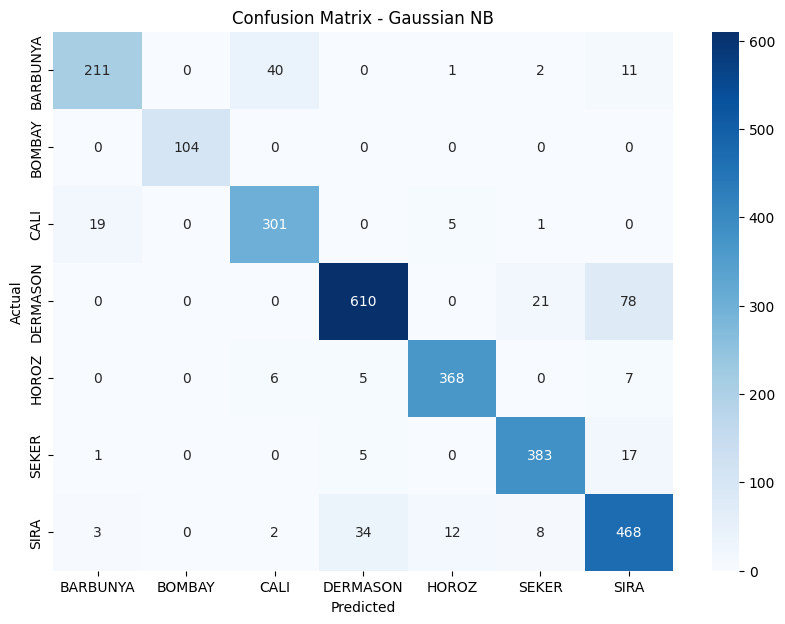

In [23]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred = gnb_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gaussian NB')
plt.show()

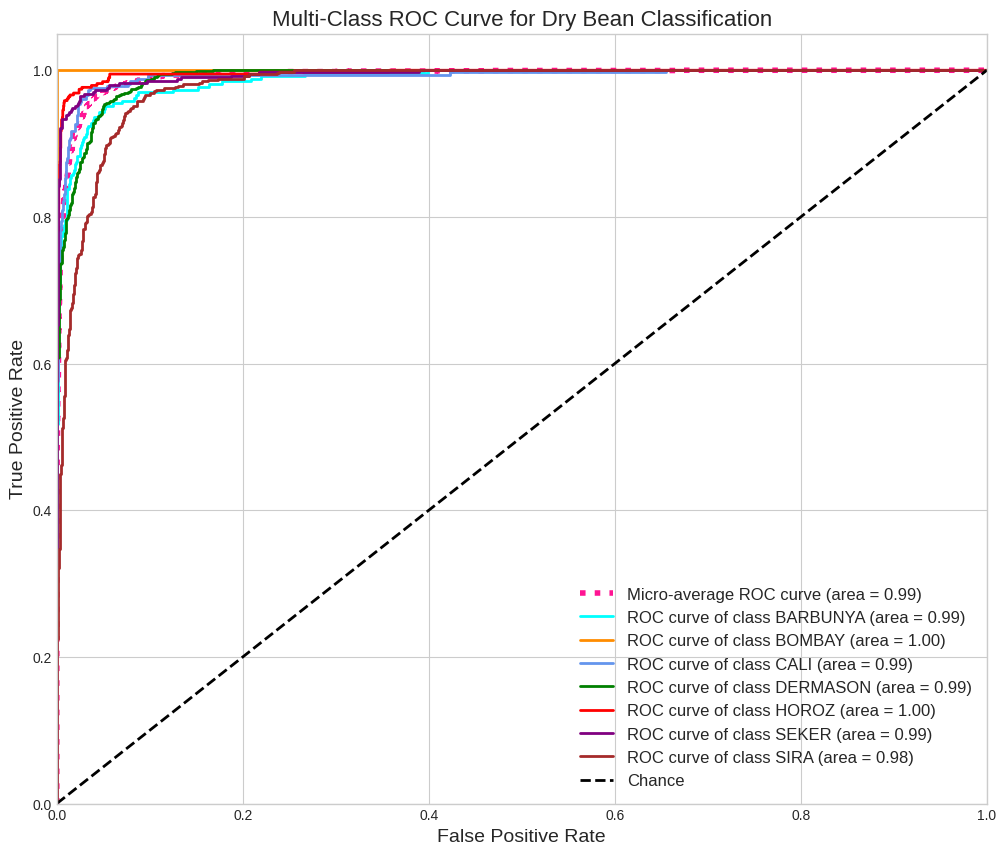